In [4]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from analysis.model_assessment import * 
import pickle
import matplotlib.pyplot as plt

In [5]:
data = np.load('../train_set.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 946)
wv_by_scene = np.split(wv, 946)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

(946, 1242, 285)
(946, 1242)


In [6]:
X_idx, y_idx = np.arange(10), np.arange(10)
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.3, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train_idx)
print('y train: ', y_train_idx)
print('X test: ', X_test_idx)
print('y test : ', y_test_idx)

X train:  [2 4 1 5 3 9 0]
y train:  [2 4 1 5 3 9 0]
X test:  [7 8 6]
y test :  [7 8 6]


In [7]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

KeyboardInterrupt: 

In [28]:
pickle.dump(rf, open('../ss_rf.pkl', 'wb'))

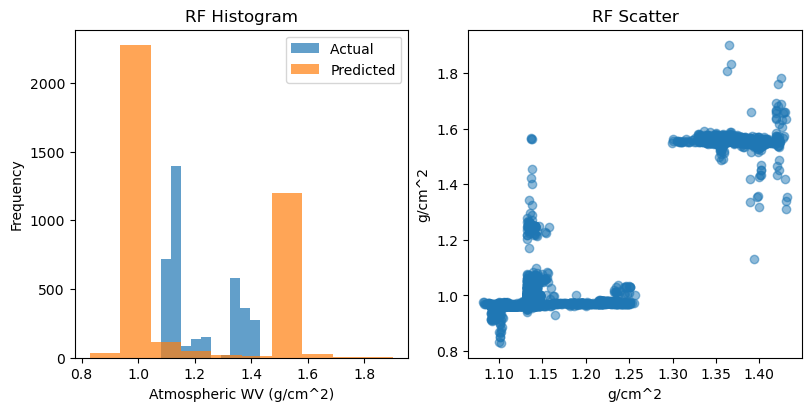

In [30]:
model_assessment.plot_hist_and_scatter(y_test, y_pred, 'RF Histogram', 'RF Scatter')

In [31]:
y_test.shape

(3726,)

In [32]:
y_pred.shape

(3726,)

In [33]:
X_train.shape

(8694, 285)

In [34]:
y_train.shape

(8694,)

In [35]:
X_test.shape

(3726, 285)

In [3]:
X_idx, y_idx = np.arange(5), np.arange(5)
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (4968, 285)
y train:  (4968,)
X test:  (1242, 285)
y test :  (1242,)
X train index:  [2 1 4 0]
y train index:  [2 1 4 0]
X test index:  [3]
y test index:  [3]


In [38]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [39]:
pickle.dump(rf, open('../ess_rf.pkl', 'wb'))

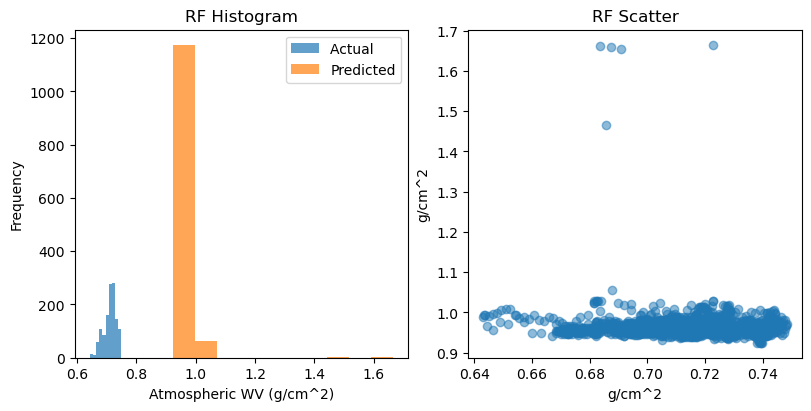

In [40]:
model_assessment.plot_hist_and_scatter(y_test, y_pred, 'RF Histogram', 'RF Scatter')

In [41]:
y_pred.shape

(1242,)

In [42]:
y_test.shape

(1242,)

In [44]:
rf.score(X_test, y_test)

-160.67322437435914

In [48]:
y_test.shape

(1242,)

In [5]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

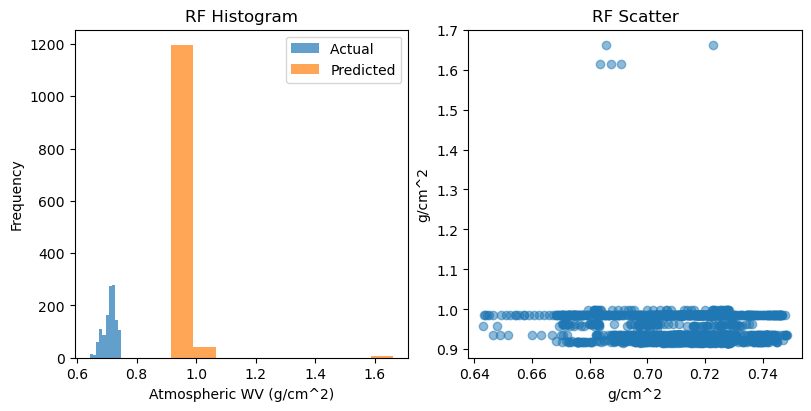

In [6]:
model_assessment.plot_hist_and_scatter(y_test, y_pred, 'RF Histogram', 'RF Scatter')

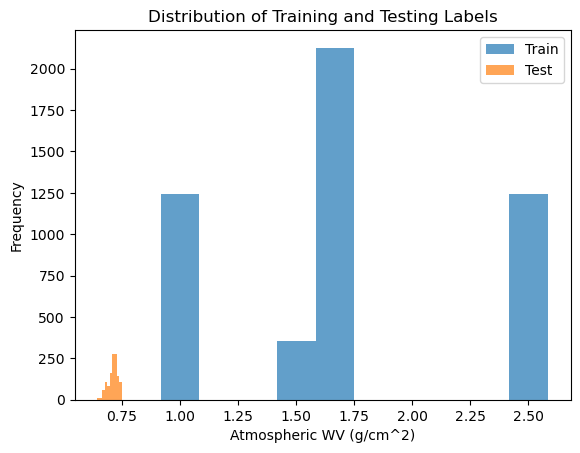

In [7]:
model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

(array([1195.,   42.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           5.]),
 array([0.91624957, 0.99089465, 1.06553972, 1.14018479, 1.21482986,
        1.28947493, 1.36412001, 1.43876508, 1.51341015, 1.58805522,
        1.6627003 ]),
 <BarContainer object of 10 artists>)

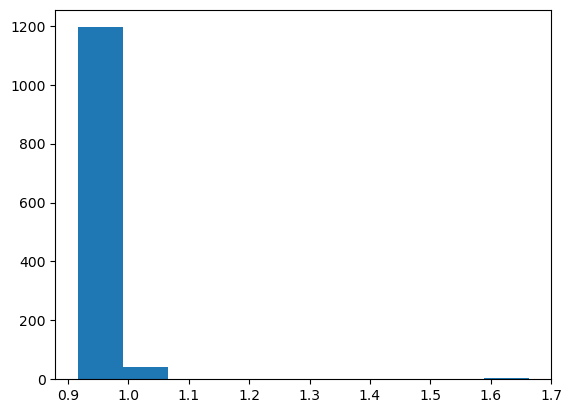

In [56]:
plt.hist(y_pred)

In [57]:
max(y_test)

0.7482467293739319

In [58]:
min(y_test)

0.6431421041488647

In [59]:
max(y_train)

2.586451292037964

In [60]:
min(y_train)

0.9162495732307434

In [21]:
np.random.seed(42)
X_idx = np.random.choice(947, 5)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (4968, 285)
y train:  (4968,)
X test:  (1242, 285)
y test :  (1242,)
X train index:  [860 435 106 102]
y train index:  [860 435 106 102]
X test index:  [270]
y test index:  [270]


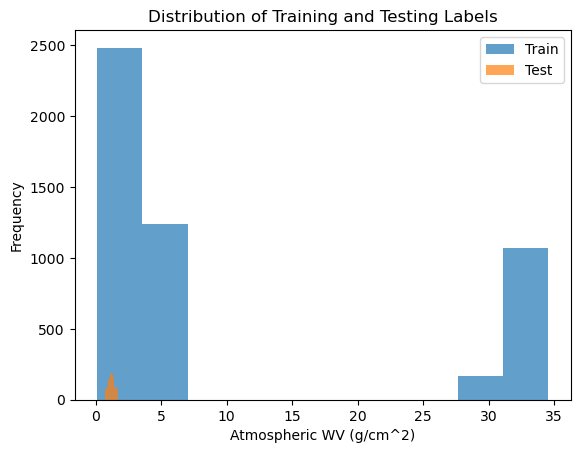

In [23]:
model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

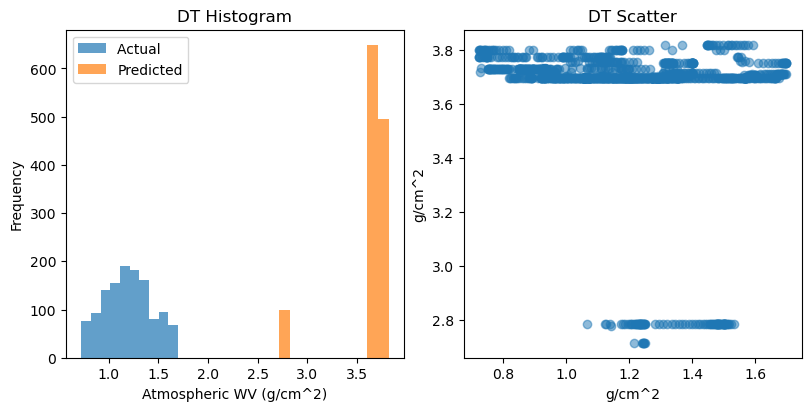

In [24]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
model_assessment.plot_hist_and_scatter(y_test, y_pred, 'DT Histogram', 'DT Scatter')

In [25]:
max(y_train)

34.53721237182617

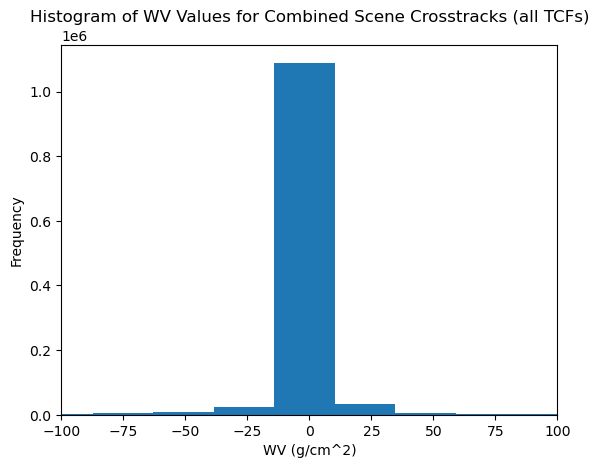

In [9]:
plt.hist(wv_by_scene.flatten(), bins = 20)
plt.xlim(-100,100)
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('Histogram of WV Values for Combined Scene Crosstracks (all TCFs)');

In [27]:
max(wv_by_scene.flatten())

229.79470825195312

In [28]:
min(wv_by_scene.flatten())

-258.0062255859375